**NEURAL NETWORKS**

Neural networks are multi-layer networks of neurons (the blue and magenta nodes in the chart below) that we use to classify things, make predictions.

![alt text](https://miro.medium.com/max/796/1*yGMk1GSKKbyKr_cMarlWnA.jpeg)

To know more about neural networks, [Click here](https://towardsdatascience.com/understanding-neural-networks-19020b758230)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


IMPORTING THE LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
plt.style.use('ggplot')

DEFINING THE DIFFERENT ACTIVATION FUNCTIONS


In [0]:
# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
#def relu(x):
#     return abs(x) * (x > 0)

#def drelu(x):
#     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
#def lrelu(x):
#    return np.where(x > 0., x, x * 0.01)

#def dlrelu(x):
#    dx = np.ones_like(x)
#   dx[x < 0.] = 0.01
#    return dx

# 4. Hyperbolic Tan Function
#def tanh(x):
#    return np.tanh(x)

#def dtanh(x):
#    return 1.0 - (np.power(np.tanh(x),2))

In [0]:
def feed_forward(data_in, w0,w1):
    layer0 = data_in
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))


    return layer0, layer1, layer2

def backpropogate(layer0, layer1, layer2, actual_y, w0,w1,learning_rate):

    l2_error = layer2- actual_y
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = layer1.T.dot(l2_delta)

    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dsigmoid(layer1)
    dh1 = layer0.T.dot(l1_delta)

    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)     
    return w0, w1

def get_accuracy(X, Y):

  layer0, layer1, y_pred = feed_forward(X, w0,w1)
  yp = np.argmax(y_pred,axis=1)
  yt = np.argmax(Y,axis=1)
  return accuracy_score(yt, yp) * 100

def get_model_description(weights):

  total = 0
  
  print("Weight ip-op", "Layer Shape", "Layer Params", sep="\t")
  for i,l in enumerate(weights):
    params = l.shape[0]*l.shape[1]
    total += params
    print(f"Layer {i}-{i+1}", l.shape, params, sep="\t")
  
  print("\nTotal Trainable Params: ", total)

LOADING DATA

In [5]:
data = pd.read_csv("/content/drive/My Drive/dataset/voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [0]:
features = data.values[:,:20]
target = data["label"].values

In [7]:
features

array([[0.0597809849598081, 0.0642412677031359, 0.032026913372582004,
        ..., 0.0078125, 0.0, 0.0],
       [0.066008740387572, 0.0673100287952527, 0.040228734810579, ...,
        0.0546875, 0.046875, 0.0526315789473684],
       [0.0773155026958227, 0.0838294209445061, 0.0367184586699814, ...,
        0.015625, 0.0078125, 0.0465116279069767],
       ...,
       [0.14205625571240602, 0.0957984262823456, 0.18373123659756999,
        ..., 2.9375, 2.9296875, 0.194758620689655],
       [0.14365874483002697, 0.09062826099732302, 0.18497616777883702,
        ..., 3.59375, 3.5859375, 0.311002178649237],
       [0.16550894600183702, 0.0928835369116316, 0.183043922369765, ...,
        0.5546875, 0.546875, 0.35]], dtype=object)

In [8]:
target

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

NORMALIZING AND ONE HOT ENCODING 

In [0]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_targets = encoder.fit_transform(target.reshape(-1,1)).toarray()

#pca = PCA(n_components=0.9) 
#reduced_features = pca.fit_transform(features)

In [10]:
one_hot_targets

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Train - Test Data Split


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(features, one_hot_targets, test_size = 0.3)

In [12]:
len(features[0])

20

DEFINE WEIGHTS AND ITERATIONS

In [13]:
np.random.seed(0)

input_nodes = len(features[0])
w0 = np.random.random((input_nodes,7))
w1 = np.random.random((7,2))

iterations = 15000

get_model_description([w0,w1])

Weight ip-op	Layer Shape	Layer Params
Layer 0-1	(20, 7)	140
Layer 1-2	(7, 2)	14

Total Trainable Params:  154


TRAINING THE MODEL AND PRINTING THE LOSS

In [14]:
train_loss = []
val_loss = []

train_acc = []
val_acc = []

iters = []
iters2 = []

for i in tqdm_notebook(range(iterations)):
# Train the model
  layer0, layer1, layer2= feed_forward(xtrain, w0,w1)
  w0,w1 = backpropogate(layer0, layer1, layer2,ytrain, w0,w1, 0.004)

  if i%10==0:
    _, _, vpred = feed_forward(xtest, w0,w1)
    tloss = np.mean(np.abs(layer2-ytrain))
    vloss = np.mean(np.abs(vpred-ytest))

    train_loss.append(tloss)
    val_loss.append(vloss)
    iters.append(int(i))
# Print Loss
    if i%1000 == 0:
      tacc = get_accuracy(xtrain, ytrain)
      vacc = get_accuracy(xtest, ytest)
      train_acc.append(tacc)
      val_acc.append(vacc)
      iters2.append(i)
      print("Train Loss: %.5f | Valdn Loss: %.5f | Train Acc. %.5f | Test  Acc. %.5f" %(tloss, vloss, tacc, vacc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Train Loss: 0.50003 | Valdn Loss: 0.49878 | Train Acc. 49.57149 | Test  Acc. 50.99895
Train Loss: 0.05408 | Valdn Loss: 0.04514 | Train Acc. 97.20343 | Test  Acc. 98.52787
Train Loss: 0.04522 | Valdn Loss: 0.03685 | Train Acc. 97.65449 | Test  Acc. 98.84332
Train Loss: 0.04068 | Valdn Loss: 0.03269 | Train Acc. 97.92512 | Test  Acc. 98.84332
Train Loss: 0.03772 | Valdn Loss: 0.02999 | Train Acc. 97.92512 | Test  Acc. 98.73817
Train Loss: 0.03561 | Valdn Loss: 0.02808 | Train Acc. 98.01534 | Test  Acc. 98.73817
Train Loss: 0.03401 | Valdn Loss: 0.02668 | Train Acc. 98.06044 | Test  Acc. 98.63302
Train Loss: 0.03271 | Valdn Loss: 0.02565 | Train Acc. 98.06044 | Test  Acc. 98.63302
Train Loss: 0.03164 | Valdn Loss: 0.02483 | Train Acc. 98.06044 | Test  Acc. 98.73817
Train Loss: 0.03082 | Valdn Loss: 0.02421 | Train Acc. 98.15065 | Test  Acc. 98.73817
Train Loss: 0.03027 | Valdn Loss: 0.02389 | Train Acc. 98.15065 | Test  Acc. 98.63302
Train Loss: 0.02992 | Valdn Loss: 0.02388 | Train Acc.

PLOT THE TRAINING AND VALIDATION ACCURACY

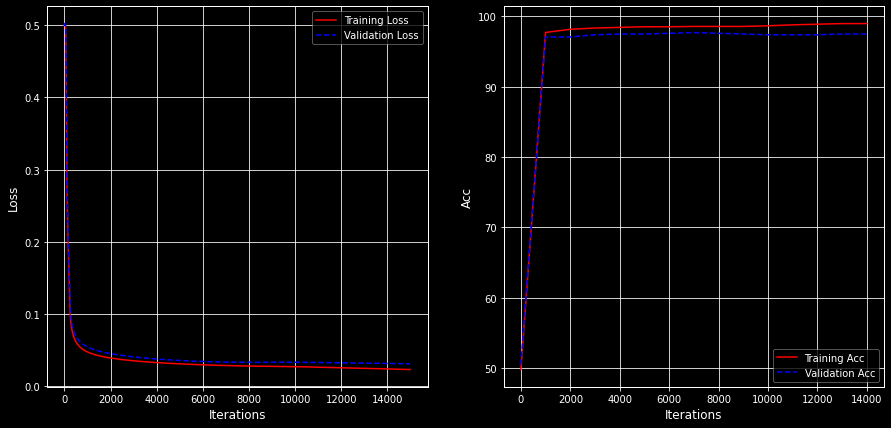

In [0]:
with plt.style.context('dark_background'):
  fig= plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(iters, train_loss, 'r', label="Training Loss")
  plt.plot(iters, val_loss, 'b--', label="Validation Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(iters2, train_acc, 'r', label="Training Acc")
  plt.plot(iters2, val_acc, 'b--', label="Validation Acc")
  plt.xlabel("Iterations")
  plt.ylabel("Acc")
  plt.legend()


The training set is used to train the model, while the validation set is used to evaluate the model's performance.

 At the moment this model has an accuracy of 98.55% on the training set and 98.42% on the validation set. This means that we can expect this model to perform with 98.42% accuracy on new data.

 Training accuracy: 98.55%

 Validation accuracy:98.42%

As the training loss and validation loss plots are parallel to each other, the data is optimally trained.It is neither underfit nor overfit.
